In [1]:
import requests
from pyquery import PyQuery as pq
import csv,os,time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
space_list = ['globe','nhem','shem','africa','asia','europe','oceania','northAmerica','southAmerica']
area_list = ['land','ocean','land_ocean']
Start_Year = input('Start Year: ')
End_Year = input('End Year: ')

Start Year: 1917
End Year: 2017


In [3]:
def get_webmsg (space_id,area_id,Start_Year,End_Year):

    sid = str(space_id)
    aid = str(area_id)
    sy = str(Start_Year)
    ey = str(End_Year)
    #url_noaa = 'https://www.ncdc.noaa.gov/cag/time-series/global/'+sid+'/land/12/1/1917-2017'
    url_noaa = 'https://www.ncdc.noaa.gov/cag/time-series/global/'+sid+'/'+aid+'/12/1/'+sy+'-'+ey+''
    #url_twse = 'https://www.ncdc.noaa.gov/cag/time-series/global/'+sid+'/
    #Surface:'land' or 'ocean' or 'land_ocean'
    #Timescale:/'12' or '6' or '3' or '1'/1/
    #Start Year:'1917'-End Year:'2017''
    res = requests.get(url_noaa)
    doc = pq(res.text) #convert data into pq
    return doc

In [4]:
def write_csv(space_id,area_id,Start_Year,End_Year,directory,filename,doc):
    writefile = directory+filename
    with open(writefile+'.csv',"w",newline='') as fOut:
        w = csv.writer(fOut) 
        w.writerows(finout)
    fOut.close() 

In [5]:
#create a directory in the current one doesn't exist
def makedirs (space_id,area_id,Start_Year,End_Year):
    sid = str(space_id)
    directory = 'D:/ClimateData'+'/'+sy+'~'+ey+'/'+aid+'/'+sid+'/'
    if not os.path.isdir(directory):
        os.makedirs (directory) # os.makedirs able to create multi folders

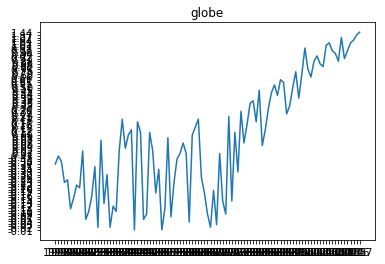

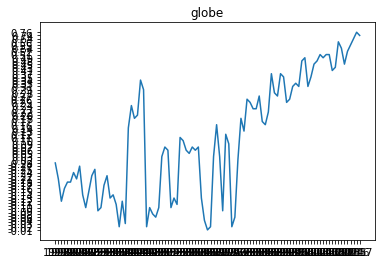

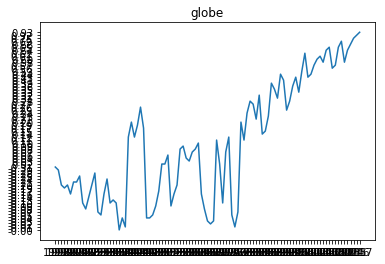

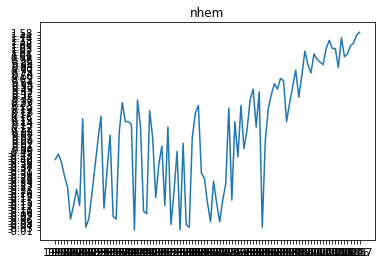

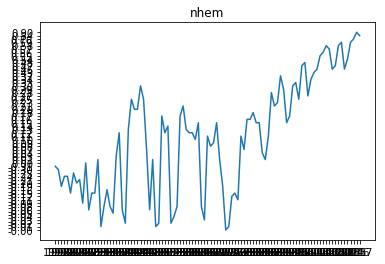

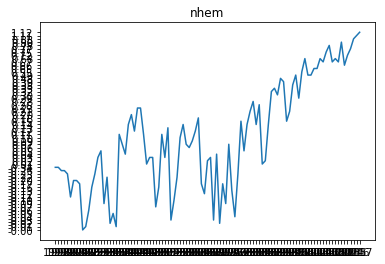

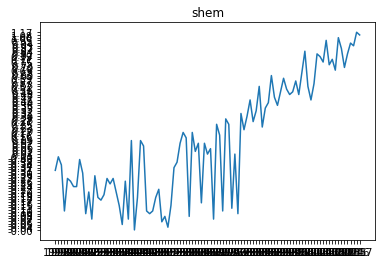

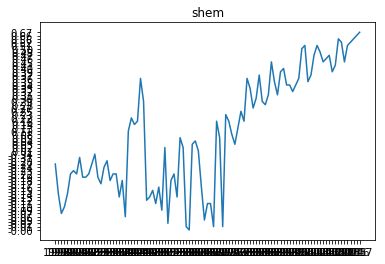

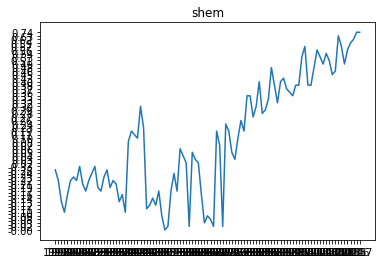

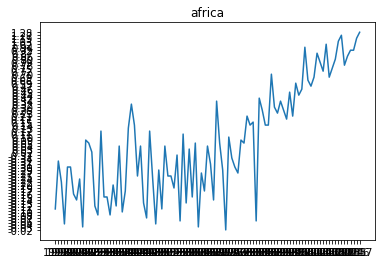

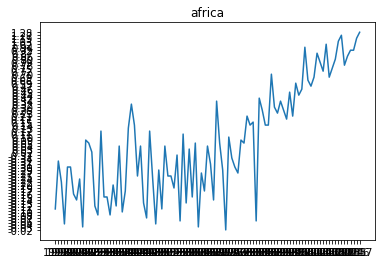

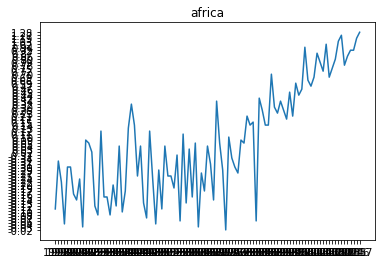

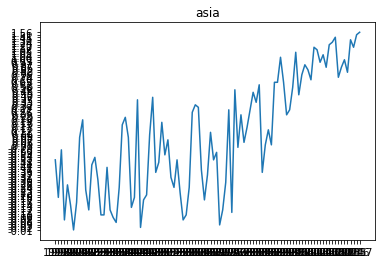

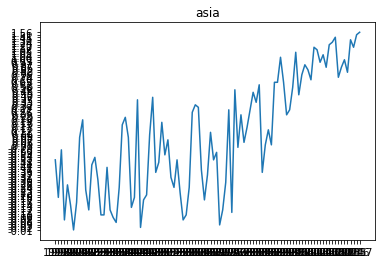

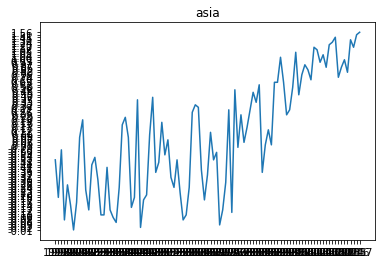

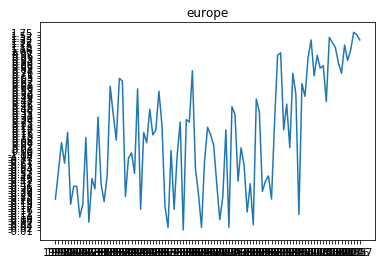

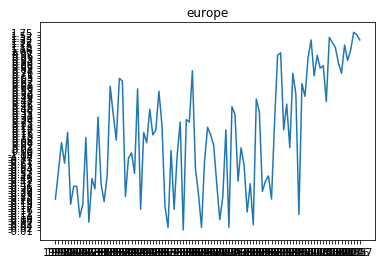

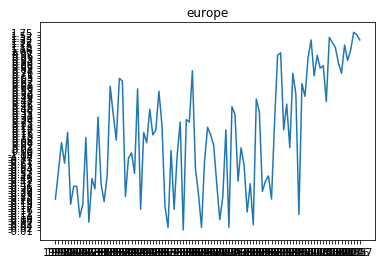

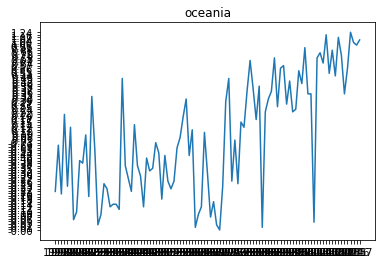

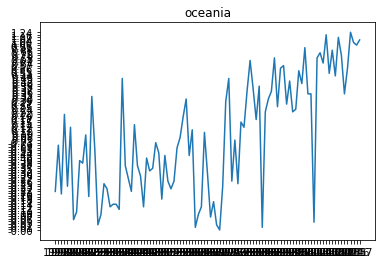

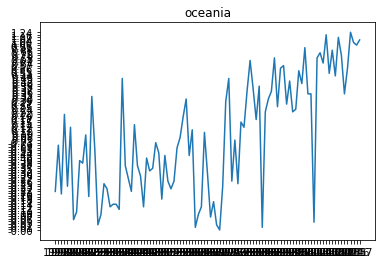

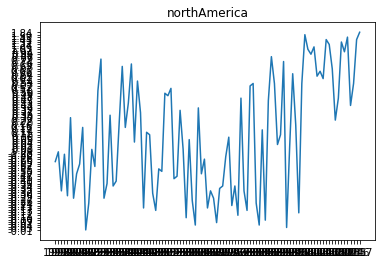

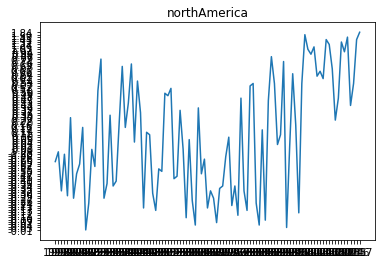

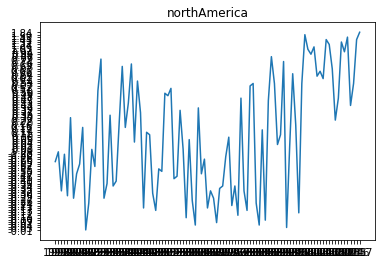

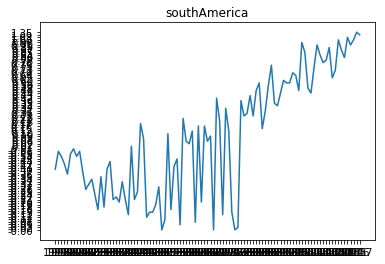

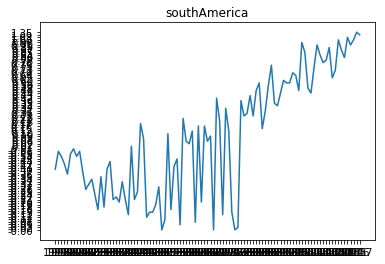

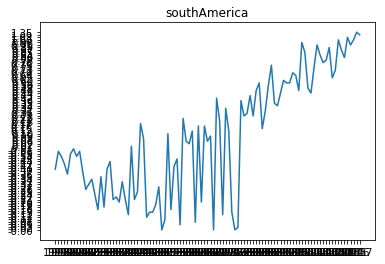

In [6]:
for space_id in space_list:
    
    for area_id in area_list:
    
        sid = str(space_id)
        aid = str(area_id)
        sy = str(Start_Year)
        ey = str(End_Year)
        directory = 'D:/ClimateData'+'/'+sy+'~'+ey+'/'+aid+'/'+sid+'/'
        filename = sy+'~'+ey+'-'+sid
        doc = get_webmsg(space_id,area_id,Start_Year,End_Year)  #create directory function

        #主要擷取的數據標的
        Time = doc(".date").text().split(" ")
        Temperature = doc(".value").text().replace('°C','').split(" ")
        #兩欄list合併
        grodict={}
        grodict = dict(zip(Time, Temperature))
        #排序
        fin=sorted(grodict.items(),key=lambda x:x[0])
        #加標題
        header = [['Time','Temperature']]
        finout = header + fin     

        makedirs (space_id,area_id,Start_Year,End_Year)           #write files into CSV
        write_csv(space_id,area_id,Start_Year,End_Year,directory,filename,doc)
        time.sleep(1)

        #出圖
        plt.title(space_id)
        plt.plot(Time,Temperature)
        plt.show()
        #x = [float(i) for i in Time]
        #y = [float(i) for i in Temperature]
        #m,b = np.polyfit(x, y, 1) 
        #plt.plot(x, y, 'yo', x, m*x+b, '--k') 
        #show() 